Otsu's threshold value is 89.0


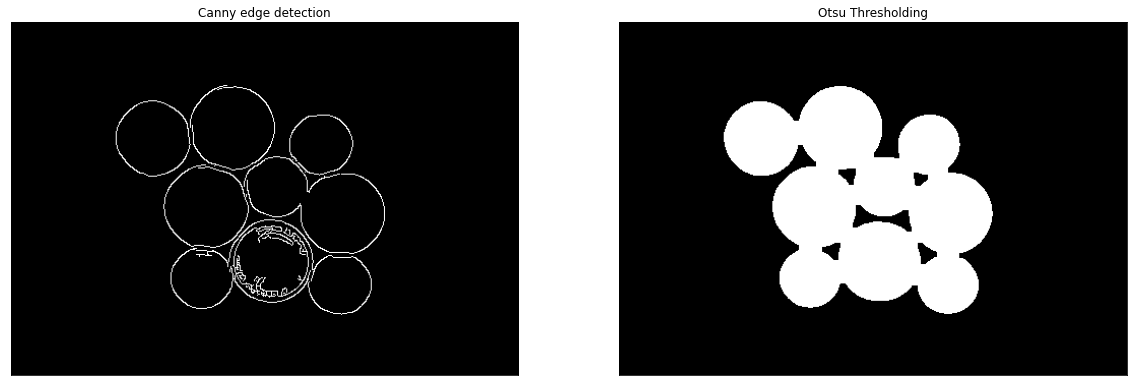

In [58]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Opean and Load image
path = r'images/watershed.jpg'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Cretae gray image and blurred it!
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray,(5,5),3)

#1st method Apply Canny edge detection (auto estimate threshold values)
median = np.median(blurred)
tuning = 11.70
minT = int((1.0-tuning)*median)
maxT = int((1.0+tuning)*median)
canny = cv2.Canny(blurred, minT, maxT)

#2nd method Apply Otsu thresholding algorithm
(Tvalue, threshOtsu) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Otsu's threshold value is {}".format(Tvalue))

#Apply morphological transformation for Otsu thresholding
RE33 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)) #create structural element rectangle 5x5
threshOtsu = cv2.morphologyEx(threshOtsu, cv2.MORPH_CLOSE, RE33)

fig1, ax = plt.subplots(1, 2, figsize=(20,14))
ax[0].set(title='Canny edge detection')
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)
ax[0].imshow(canny, cmap='gray')
ax[1].set(title='Otsu Thresholding')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
ax[1].imshow(threshOtsu, cmap='gray')

From Canny, I can count 7 coins in this image
From Otsu, I can count 1 coins in this image


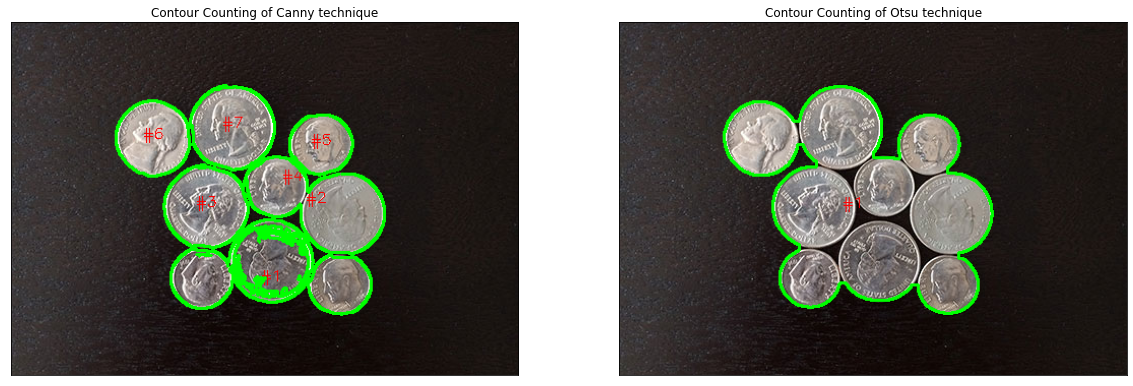

In [59]:
#Find contour on edged image
(cnts1, _) = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
(cnts2, _) = cv2.findContours(threshOtsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
coins1 = image.copy()
coins2 = image.copy()
print("From Canny, I can count {} coins in this image".format(len(cnts1)))
print("From Otsu, I can count {} coins in this image".format(len(cnts2)))

#Looping over each countour
for (i, c) in enumerate(cnts1):
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.putText(coins1, "#{}".format(i+1), (int(cX)-10, int(cY)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)
    cv2.drawContours(coins1, [c], -1, (0,255,0), 2)

for (i, c) in enumerate(cnts2):
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.putText(coins2, "#{}".format(i+1), (int(cX)-10, int(cY)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)
    cv2.drawContours(coins2, [c], -1, (0,255,0), 2)

fig2, ax = plt.subplots(1, 2, figsize=(20,14))
ax[0].set(title='Contour Counting of Canny technique')
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)
ax[0].imshow(coins1)
ax[1].set(title='Contour Counting of Otsu technique')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
ax[1].imshow(coins2)